## **PRINCIPAL COMPONENT ANALYSIS (PCA)**

Es una técnica utilizada para reducción de dimensionalidad, compresión de datos, extracción de características y visualización de datos. También es conocida como **transformación Karhunen-Loéve**.

El método **PCA** puede definirse como una proyección ortogonal de los datos en un espacio lineal de menor dimensión, conocido como *subespacio principal* en el cual la **varianza de los datos proyectados es maximizada**. Otra forma de entender el problema es buscar una proyección lineal que minimiza el costo promedio de proyección, el cual se define como la distancia media al cuadrado entre los datos y sus proyecciones.

## **Definiciones**


### Espacio vectorial

Un **espacio vectorial** $V$ sobre un campo $K$ es un conjunto $V$ (no vacío) con dos operaciones: **suma +** y **producto escalar $\cdot$**:
\begin{eqnarray}
+ &:=& V \times V \rightarrow V\\
* &:=& K \times V \rightarrow V
\end{eqnarray}

para las cuales se cumplen las siguientes propiedades:

(**Suma**)
* Conmutatividad
$$\textbf{u}+\textbf{v} = \textbf{v} + \textbf{u} \qquad \forall \textbf{u}, \textbf{v}\in V$$
* Asociatividad
$$\textbf{u}+(\textbf{v}+\textbf{w}) = (\textbf{u}+\textbf{v})+\textbf{w}, \qquad \forall \textbf{u}, \textbf{v}, \textbf{w}\in V$$
* Existencia del elemento neutro
$$\exists \textbf{0}\in V: \ \textbf{u}+\textbf{0}=\textbf{u}, \qquad \forall \textbf{u}\in  V$$
* Existencia del elemento inverso
$$ \forall \textbf{u}\in V \quad \exists (-\textbf{u})\in V: \ \textbf{u}+(-\textbf{u})=\textbf{0}$$

(**Producto escalar**)
* Asociatividad
$$a (b * \textbf{u}) = (a b)* \textbf{u},  \qquad \forall a,b \in K, \ \forall \textbf{u}\in V$$
* Existencia de elemento neutro
$$\exists e\in K: \ e * \textbf{u} = \textbf{u}, \qquad \forall \textbf{u}\in V$$
* Distributividad para la suma vectorial
$$ a* (\textbf{u}+\textbf{v}) = a * \textbf{u}+a *\textbf{v}, \qquad \forall a\in K, \ \forall \textbf{u}, \textbf{v}\in V$$
* Distributividad para la suma escalar
$$(a+b)*\textbf{u} = a * \textbf{u}+ b * \textbf{u}, \qquad \forall  a,b \in K, \ \forall \textbf{u}\in V$$

### Subespacio vectorial

Sea $V$ un espacio vectorial sobre el campo $K$, y $U\subset V$, con $U\neq \emptyset$. El subconjunto $U$ es un **subespacio vectorial** si
\begin{eqnarray}
\forall \textbf{u}, \textbf{v}\in U &\Rightarrow& \textbf{u}+\textbf{v}\in U\\
\forall \textbf{u}\in U, \ \forall a\in K &\Rightarrow& a\textbf{u}\in U
\end{eqnarray}


### Producto punto



La interpretación geométrica del  **producto punto** o **producto interior** entre dos vectores en $\mathbb{R}^n$ es la siguiente:

$$\textbf{u} \cdot \textbf{v}  = ||\textbf{u}|| ||\textbf{v}||\cos{(\theta)}$$

Es decir, como el producto de las magnitudes de ambos vectores con el coseno del ángulo entre ellos. Observe que si los dos vectores apuntan en la misma dirección entonces:
$$\textbf{u} \cdot \textbf{v}  = ||\textbf{u}|| ||\textbf{v}||$$

Mientras que si
$$\textbf{u} \cdot \textbf{v}  = 0$$
los vectores son ortogonales.

Por trigonometría, tenemos que

$$\cos{(\theta)}= \frac{\|proy_{\textbf{u}\|}(\textbf{v})}{||\textbf{v}||}$$

Por la representación geométrica del producto punto podemos despejar $\cos{(\theta)}$:

$$\cos{(\theta)} = \frac{\textbf{u} \cdot \textbf{v}}{||\textbf{u}|| ||\textbf{v}||}$$

Combinando ambas ecuaciones se tiene:
$$\frac{\|proy_{\textbf{u}}(\textbf{v})\|}{||\textbf{v}||}=\frac{\textbf{u} \cdot \textbf{v}}{||\textbf{u}||||\textbf{v}|| } $$
$$\|proy_{\textbf{u}}(\textbf{v})\| = \frac{\textbf{u} \cdot \textbf{v}}{||\textbf{u}|| }$$

Este resultado corresponde a la magnitud de la proyección del vector $\textbf{v}$ en la dirección del vector $\textbf{u}$.

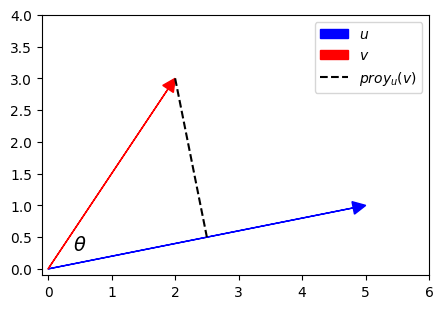

In [2]:
### EJEMPLO DE LA PROYECCIÓN DE V SOBRE U ###

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Define vectors u and v
u = np.array([5, 1])
v = np.array([2, 3])

# Calculate the projection of v onto u
dot_product = np.dot(u, v)
u_norm = np.linalg.norm(u)
project_magn = dot_product/ u_norm
projection = project_magn *(u / u_norm)

# Create plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.arrow(0, 0, u[0], u[1], fc='blue', ec='blue',  label=f'$u$',
         length_includes_head=True, head_width=0.2, head_length=0.2)
ax.arrow(0, 0, v[0], v[1], fc='red', ec='red',  label=f'$v$',
         length_includes_head=True, head_width=0.2, head_length=0.2)
ax.plot([v[0], projection[0]], [v[1], projection[1]], 'k--', label=f'$proy_u(v)$')
ax.text(0.5, 0.3, r'$\theta$', fontsize=14, ha='center')
ax.set_xlim(-0.1, 6)
ax.set_ylim(-.1, 4)
ax.legend()
ax.set_aspect('equal')
plt.show()

### Vector y valor propio

Sea $A$ una matriz cuadrada.

Se dice que un escalar  $\lambda \in \mathbb{R}$ es un **valor propio** de $A$ si existe un vector $\textbf{v}\in V$ no nulo, tal que
$$A \textbf{v} = \lambda \textbf{v}$$
Este vector se conoce como el **vector propio** correspondiente a $\lambda$. Esto equivale a
$$(A-\lambda I) \textbf{v}=\textbf{0}$$

y dado que $\textbf{v} \neq \textbf{0}$ esto implica que las columnas de la matriz $(A-\lambda I)$ son linealmente dependientes y la matriz $(A-\lambda I)$ no es invertible. Esto a su vez, implica sí y sólo sí, que el determinante de $A-\lambda I$ es igual a 0.

Dado que la matriz $A$ y la matriz $I$ son fijas, procedemos de manera inversa, buscando un valor de $\lambda$ tal que

$$\det{(A-\lambda I)}=0$$

Esta formulación cual es conocida como el **polinómio característico** de $A$. Las raíces de ese polinómio corresponde a los valores propios de A. Finalmente, para cada valor propio $\lambda$ de $A$ debe encontrarse una base del espacio nulo, denotado por

$$Nul(A-\lambda I)$$

Es decir, los vectores $\textbf{v}$ que solucionan el sistema de ecuaciones lineales, para un $\lambda$ conocido:
$$(A-\lambda I)\textbf{v}=0$$

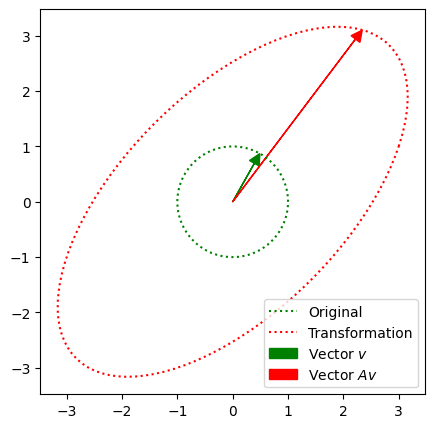

In [7]:
# Define the matrix A and some vector v
A = np.array([[3, 1], [1, 3]])
v = np.array([.49, .87])

# Unit circle
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)
circle = np.vstack((x, y))

# Transformation with matrix A
transformed_circle = np.dot(A, circle)
transformed_v = np.dot(A, v)

# Create plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(circle[0, :], circle[1, :], 'g:', label='Original')
ax.plot(transformed_circle[0, :], transformed_circle[1, :], 'r:', label='Transformation')
ax.arrow(0, 0, v[0], v[1], fc='g', ec='g',  label=f'Vector $v$',
         length_includes_head=True, head_width=0.2, head_length=0.2)
ax.arrow(0, 0, transformed_v[0], transformed_v[1], fc='r', ec='r',  label=f'Vector $Av$',
         length_includes_head=True, head_width=0.2, head_length=0.2)
ax.legend()
ax.set_aspect('equal')
plt.show()

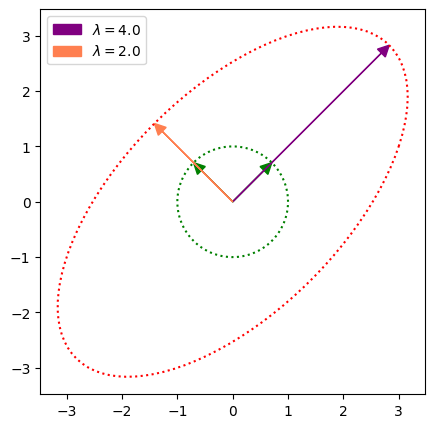

In [8]:
# Calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A)
transformed_eigenvectors = eigenvectors*eigenvalues

# Create plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(circle[0, :], circle[1, :], 'g:')
ax.plot(transformed_circle[0, :], transformed_circle[1, :], 'r:')
colors = ["purple", "coral"]
for i in range(2):
  ax.arrow(0, 0, eigenvectors[0, i], eigenvectors[1, i],
           fc='g', ec='g',
           length_includes_head=True, head_width=0.2, head_length=0.2)
  ax.arrow(0, 0, transformed_eigenvectors[0, i], transformed_eigenvectors[1, i],
           fc=colors[i], ec=colors[i],  label=f'$\lambda={eigenvalues[i]}$',
          length_includes_head=True, head_width=0.2, head_length=0.2)
ax.legend()
ax.set_aspect('equal')
plt.show()

### Teorema espectral (matrices simétricas reales)

**Teorema** Sea $\textbf{A}$ una **matriz simétrica** de $l\times l$, $\textbf{A}^T \textbf{A}$. Entonces los vectores propios correspondientes a **distintos** valores propios son **ortogonales**.

**Dem**

Sea $\lambda_i \neq \lambda_j$ dos valores propios diferentes de $\textbf{A}$. Por definición, sus vectores propios $\textbf{v}_i, \textbf{v}_j$ cumplen:

\begin{eqnarray}
\textbf{A}\textbf{v}_i &=& \lambda_i \textbf{v}_i \tag{1}\\
\textbf{A}\textbf{v}_j &=& \lambda_j \textbf{v}_j \tag{2}\\
\end{eqnarray}



Multiplicando la primera ecuación por la izquierda por $\textbf{v}_j^T$ obtenemos:

$$\textbf{v}_j^T \textbf{A} \textbf{v}_i = \lambda_i \textbf{v}_j^T \textbf{v}_i \tag{3}$$

Por otra parte si transponemos ambos lados de la ecuación (2) tenemos:

\begin{eqnarray}
(\textbf{A}\textbf{v}_j)^T &=& (\lambda_j \textbf{v}_j)^T\\
\textbf{v}_j^T\textbf{A}^T &=& \lambda_j \textbf{v}_j^T\\
\textbf{v}_j^T\textbf{A} &=& \lambda_j \textbf{v}_j^T\\
\end{eqnarray}

Y al resultado lo multiplicamos por $\textbf{v}_i$ por la izquierda llegamos a que:
$$\textbf{v}_j^T \textbf{A} \textbf{v}_i = \lambda_j \textbf{v}_j^T \textbf{v}_i \tag{4}$$

Restando la ecuación (4) a la ecuación (3) obtenemos:

\begin{eqnarray} \textbf{v}_j^T \textbf{A} \textbf{v}_i-\textbf{v}_j^T \textbf{A} \textbf{v}_i &=& \lambda_i \textbf{v}_j^T \textbf{v}_i - \lambda_j \textbf{v}_j^T \textbf{v}_i\\
0 &=& (\lambda_i-\lambda_j) \textbf{v}_j^T \textbf{v}_i \\
\end{eqnarray}

Dado que $\lambda_i\neq\lambda_j$, eso implica que
$$\textbf{v}_j^T \textbf{v}_i = 0$$
Es decir, los vectores propios son **ortogonales**.
$\square$

## **Formulación de máxima varianza**

Considere un conjunto de observaciones
$$\textbf{X} = \{\textbf{x}_1, \ldots, \textbf{x}_n\}$$
donde $\textbf{x}_i \in \mathbb{R}^D, \ i=1,\ldots, n$.

El **objetivo** es **proyectar** los datos en un espacio de dimensión $M<D$, mientras se **maximiza la magnitud de la varianza  de los datos proyectados**.

Primero, considere la proyección en un espacio uno-dimensional ($M=1$). Sea $\textbf{u}_1$ el vector que define la dirección de este espacio.

Por conveniencia y sin pérdida de generalidad se supone que es un vector unitario, es decir,
$$\textbf{u}_1^T\textbf{u}_1 =1$$

Por lo tanto, la (magnitud de una) proyección de una observación $\textbf{x}_i$ en $\textbf{u}_1$ es:
\begin{eqnarray}
\|proy_{\textbf{u}_1}(\textbf{x}_i)\| &=& \frac{\textbf{u}_1 \cdot \textbf{x}_i}{||\textbf{u}_1|| }\\
&=& \frac{\textbf{u}_1^T \textbf{x}_i}{1}\\
 &=&  \textbf{u}_1^T \textbf{x}_i\\
\end{eqnarray}



Entonces la media de (la magnitud) de las proyecciones es:
\begin{eqnarray}
\overline{\|proy_{\textbf{u}_1}(\textbf{x}_i) \|} &=& \frac{1}{n} \sum_{i=1}^{n} \|proy_{\textbf{u}_1}(\textbf{x}_i) \|\\
&=& \frac{1}{n} \sum_{i=1}^{n} \textbf{u}_1^T \textbf{x}_i\\
&=& \frac{1}{n} (\textbf{u}_1^T \textbf{x}_1+\textbf{u}_1^T \textbf{x}_2+\ldots+ \textbf{u}_1^T \textbf{x}_n)\\
&=& \frac{1}{n}\textbf{u}_1^T \left(\sum_{i=1}^n \textbf{x}_i \right)\\
&=& \textbf{u}_1^T \left(\frac{1}{n}\sum_{i=1}^n \textbf{x}_i \right)\\
&=&  \textbf{u}_1^T\overline{\textbf{x}}\\
&=& \overline{proy}_1
\end{eqnarray}

La matriz de covarianza de las observaciones se define como:

$$\textbf{S} = \frac{1}{n}\sum_{i=1}^n (\textbf{x}_i- \overline{\textbf{x}})(\textbf{x}_i-\overline{\textbf{x}})^T $$



AL multiplicar la matriz $\textbf{S}$ por $\textbf{u}_1$ desde la izquierda y la derecha se tiene:

\begin{eqnarray}
\textbf{u}_1^T \textbf{S} \textbf{u}_1
&=& \textbf{u}_1^T \left( \frac{1}{n} \sum_{i=1}^n (\textbf{x}_i-\overline{\textbf{x}})(\textbf{x}_i-\overline{\textbf{x}})^T\right)\textbf{u}_1\\
&=& \frac{1}{n} \sum_{i=1}^n \textbf{u}_1^T (\textbf{x}_i-\overline{\textbf{x}})(\textbf{x}_i-\overline{\textbf{x}})^T\textbf{u}_1\\
&=& \frac{1}{n} \sum_{i=1}^n \left(\textbf{u}_1^T (\textbf{x}_i-\overline{\textbf{x}})\right)\left((\overline{\textbf{x}}-\overline{\textbf{x}})^T\textbf{u}_1\right)\\
&=& \frac{1}{n} \sum_{i=1}^n \left(\textbf{u}_1^T (\textbf{x}_i-\overline{\textbf{x}})\right)^2\\
&=& \frac{1}{n} \sum_{i=1}^n \left(\textbf{u}_1^T \textbf{x}_i-\textbf{u}_1^T\overline{\textbf{x}}\right)^2\\
&=&\frac{1}{n} \sum_{i=1}^n \left(\|proy_{\textbf{u}_1}(\textbf{x}_i)\|\ -\overline{proy}_1\right)^2
\end{eqnarray}

Recordado que la magnitud de los datos proyectados $\textbf{x}_i\in \textbf{X}$ sobre $\textbf{u}_1$ equivalen a :
$$ \|proy_{\textbf{u}_1}(\textbf{x}_i)\| = \textbf{u}_1^T \textbf{x}_i$$
Entonces, la varianza de la magnitud de los datos proyectados es igual a

$$Var\left(\|proy_{\textbf{u}_1}(\textbf{x}_i)\|\right) =\frac{1}{n} \sum_{i=1}^n \left(\textbf{u}_1^T \textbf{x}_i-\textbf{u}_1^T\overline{\textbf{x}}\right)^2 = \textbf{u}_1^T \textbf{S} \textbf{u}_1$$

Por lo tanto, el objetivo es maximizar la varianza de los datos proyectados $ \textbf{u}_1^T \textbf{S} \textbf{u}_1$ con respecto al vector $\textbf{u}_1$, sujeto a que $\textbf{u}_1^T \textbf{u}_1=1$ para evitar que la magnitud de $\textbf{u}_1$ crezca indefinidamente. Es decir, se debe resolver el siguiente problema de optimización con restricciones:

\begin{eqnarray}
\max_{\textbf{u}_1} & \ & \textbf{u}_1^T \textbf{S} \textbf{u}_1 \\
&&\text{s.a} \ \ \textbf{u}_1^T \textbf{u}_1=1
\end{eqnarray}

Usando un multiplicador de Lagrange $\lambda_1$ se obtiene la función Lagrangiana

$$L(\textbf{u}_1, \lambda_1) = \textbf{u}_1^T \textbf{S} \textbf{u}_1 +\lambda_1 (1-\textbf{u}_1^T \textbf{u}_1)$$

Derivando con respecto de $\textbf{u}_1$ se tiene que

$$\frac{\partial L(\textbf{u}_1, \lambda_1)}{\partial \textbf{u}_1} = 2(\textbf{S} \textbf{u}_1 - \lambda_1 \textbf{u}_1)$$

Igualando a O, tenemos que cualquier punto estacionario de la función Lagrangiana debe cumplir que

\begin{eqnarray}
2(\textbf{S} \textbf{u}_1 - \lambda_1 \textbf{u}_1) &=& 0 \\
\textbf{S} \textbf{u}_1 - \lambda_1 \textbf{u}_1 &=& 0\\
\textbf{S}\textbf{u}_1 &=& \lambda_1 \textbf{u}_1
\end{eqnarray}


Esto significa que la dirección que maximiza la varianza de los datos proyectados debe ser un **vector propio** de $\textbf{S}$.

Si multiplicamos la ecuación por $\textbf{u}_1$ y usamos que $\textbf{u}_1^T \textbf{u}_1=1$ se tiene que:

$$\textbf{u}_1^T \textbf{S} \textbf{u}_1 = \lambda_1$$

Por lo tanto, la **varianza de la magnitud de las proyecciones** será máxima cuando $\textbf{u}_1$ corresponda al vector propio correspondiente al **valor propio** más grande $\lambda_1$. Este vector propio es conocido como el **Primer Componente Principal**.

### Demostración para $M+1$ con inducción

Ahora, supongamos que el resultado anterior se sostiene para $M$ dimensiones. esto es, las primeras $M$ direcciones $\textbf{u}_1, \ldots, \textbf{u}_M$ que maximizan la varianza de la magnitud de las proyecciones de los datos sobre sí mismas
\begin{eqnarray}
Var(\|proy_{\textbf{u}_1}(\textbf{x}_i)\|) &\geq& \\
Var(\|proy_{\textbf{u}_2}(\textbf{x}_i)\|)&\geq&\\
&\vdots&\\
 Var(\|proy_{\textbf{u}_M}(\textbf{x}_i)\|)
&\geq& \\
 Var(\|proy_{\textbf{u}}(\textbf{x}_i)\|),  & & \quad \forall \textbf{u}\in \mathbb{R}^l, \ \textbf{u}\notin \{\textbf{u}_1,\ldots,\textbf{u}_M\},  \ \forall \textbf{x}_i \in \textbf{X}
\end{eqnarray}
corresponde a los vectores propios asociados a los $M$ valores propios más grandes $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_M$ de la matriz de covarianza $\textbf{S}$ (por lo tanto, vectores ortogonales),

Lo que buscamos demostrar es que la dirección $\hat{\textbf{u}} \neq \{\textbf{u}_1,\ldots,\textbf{u}_M\}$ que maximiza la varianza de la magnitud de los datos proyectados sobre ella es justamente el vector propio correspondiente al $M+1$-ésimo valor propio más grande de la matriz $\textbf{S}$

Al ser un vector propio de una matriz simétrica, por el teorema espectral de matrices simétricas, debe ser ortogonal a los otros $M$ vectores propios $\textbf{u}_i$ anteriores. Por lo tanto, el vector buscado es el argumento máximo del siguiente problema de **optimización con restricciones**

\begin{eqnarray}
\max_{\textbf{u}_*} \textbf{u}_*^T \textbf{S} \textbf{u}_* &&\\
\text{s.a} \ \ \textbf{u}_*^T \textbf{u}_*&=&1\\
 \textbf{u}_*^T \textbf{u}_i&=&0, \quad \forall i=1,\ldots,M
\end{eqnarray}

La función lagrangiana asociada a este problema es

$$L = \textbf{u}_{*}\textbf{S} \textbf{u}_{*} + \lambda_{*}(1-\textbf{u}_{*}^T \textbf{u}_{*})+\sum_{i=1}^M \eta_i \textbf{u}_{*}^T \textbf{u}_i$$

donde $\{\lambda_{M+1}, \eta_1, \ldots, \eta_M\}$ son multiplicadores de Lagrange.

Para resolver el problema derivamos $L$ derivamos respecto al vector $\textbf{u}_{*}$ e igualamos a 0, obteniendo la siguiente restricción que debe cumplir los puntos estacionarios

$$2\textbf{S}\textbf{u}_{*}- 2\lambda_{*}\textbf{u}_{*}+\sum_{i=1}^M \eta_i \textbf{u}_i=\textbf{0} $$

Multiplicando la ecuación por cada $\textbf{u}_j^T$ por la izquierda (con $j=1,\ldots,M$) tenemos el conjunto de ecuaciones:



\begin{eqnarray}
2\textbf{u}_1^T\textbf{S}\textbf{u}_{*}- 2\textbf{u}_1^T\lambda_{*}\textbf{u}_{*}+\textbf{u}_1^T\sum_{i=1}^M \eta_i\textbf{u}_i &=& 0 \\
&\vdots&\\
2\textbf{u}_M^T\textbf{S}\textbf{u}_{*}- 2\textbf{u}_M^T\lambda_{*}\textbf{u}_{*}+\textbf{u}_M^T\sum_{i=1}^M \eta_i\textbf{u}_i &=& 0
\end{eqnarray}

Tomemos cualquiera de esas ecuaciones (con $j \in \{1,2,\ldots, M\}$),

$$2\textbf{u}_j^T\textbf{S}\textbf{u}_{*}- 2\textbf{u}_j^T\lambda_{*}\textbf{u}_{*}+\textbf{u}_j^T\sum_{i=1}^M \eta_i\textbf{u}_i = 0 $$

por la condición de ortogonalidad sabemos que

\begin{eqnarray}
\textbf{u}_j^T\textbf{u}_{*}&=&0\\
\textbf{u}_j^T\textbf{u}_{i}&=&0, \forall i=1,\ldots, M, \ i\neq j\\
\end{eqnarray}


Además, como $\textbf{S}$ es simétrica, entonces

\begin{eqnarray}
(\textbf{u}_j^T\textbf{S})\textbf{u}_{*} &=&\textbf{u}_{*}^T(\textbf{u}_j^T\textbf{S})^T \\
&=& \textbf{u}_{*}^T \left(S^T (\textbf{u}_j^T)^T\right)\\
&=& \textbf{u}_{*}^T S \textbf{u}_j\\
\end{eqnarray}

Pero como $\textbf{u}_j$ es un valor propio, entonces

\begin{eqnarray}
\textbf{u}_{*}^T S \textbf{u}_j &=& \textbf{u}_{*}^T (\lambda_j \textbf{u}_j)\\
&=&  \lambda \textbf{u}_{*}^T \textbf{u}_j\\
&=& 0
\end{eqnarray}

Por lo tanto

\begin{eqnarray}
2(0)- 2\lambda_{*}0+\eta_j (1)  &=& 0\\
\eta_j  &=& 0\\
\end{eqnarray}

para cualquier $j=1,\ldots,M$



Entonces de la ecuación

$$2\textbf{S}\textbf{u}_{*}- 2\lambda_{*}\textbf{u}_{*}+\sum_{i=1}^M \eta_i \textbf{u}_i=\textbf{0} $$

concluimos que

$$2(\textbf{S}\textbf{u}_{*}- \lambda_{*}\textbf{u}_{*})=\textbf{0} $$

Esto implica que
$$\textbf{S}\textbf{u}_{*} = \lambda_{*}\textbf{u}_{*}$$

Es decir, que $\textbf{u}_*$ y $\lambda_*$ deben ser valores y vectores propios de $\textbf{S}$.

Dado que lo que buscamos es maximizar la función

$$\textbf{u}_*^T \textbf{S} \textbf{u}_*  = \lambda_*$$

El vector propio que lo máximiza es el asociado al $M+1$ esimo valor propio más grande de $\textbf{S}$.
Entonces para maximizar la varianza es necesario tomar el valor propio más grande no seleccionado. Con esto se completa la demostración por inducción. $\square$

**Conclusión**


Para realizar el **Analisis de Componentes Principales** debe calcularse  la matriz de covarianza $\textbf{S}$ del conjunto de datos, y encontrar los $M$ vectores propios de $\textbf{S}$ que corresponden a los $M$ valores propios más grandes.

## **Ejemplo**

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importar datos
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

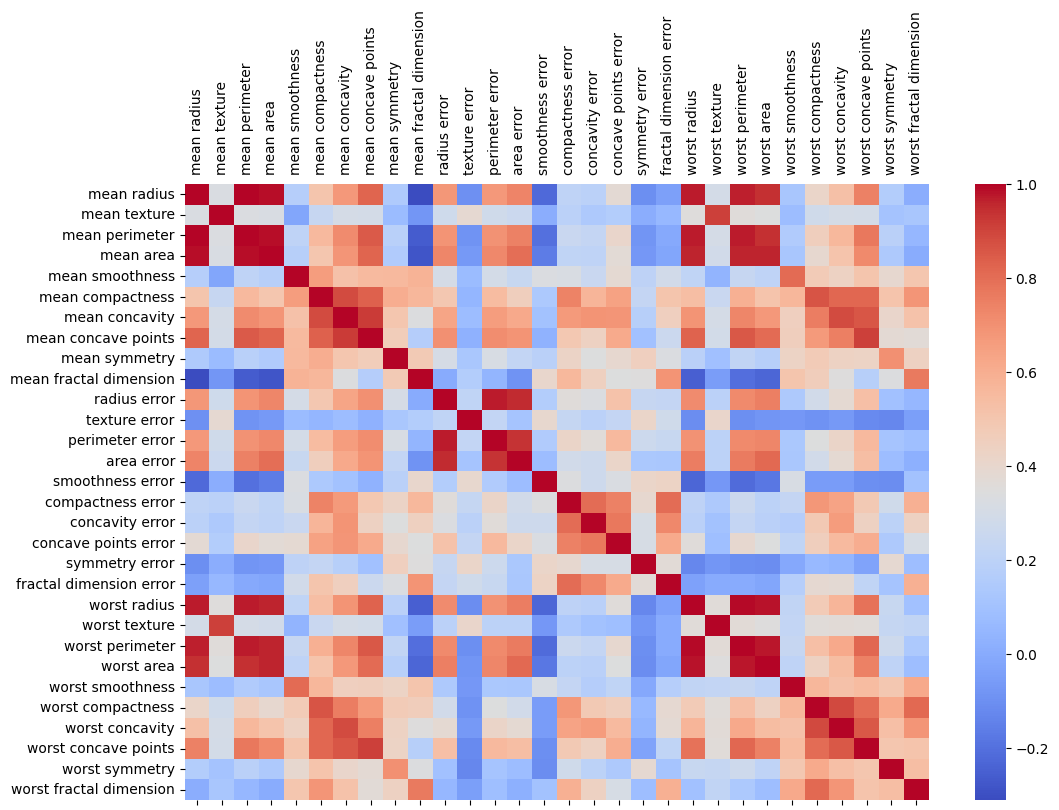

In [ ]:
# Crear heatmap de la correlación
corr = df.corr()
plt.figure(figsize=(12, 8))
plt.tick_params(axis='x', labeltop=True, labelbottom=False)
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [ ]:
# Seleccionar variables
#cols = ['mean radius', 'mean texture', 'mean smoothness']
#cols = ['mean radius', 'mean perimeter', 'mean area']
cols = ['mean radius', 'mean texture', 'mean area']

In [ ]:
# Calcular matriz de covarianza S
S = np.matrix(df[cols].cov())
# Calcular valores y vectores propios de la matriz
eigenvalues, eigenvectors = np.linalg.eig(S)
for eigenvalue in eigenvalues:
  print(eigenvalue)
# Ordenar vectores propios por su valor propio
order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

2.1695375718721426
0.012660960490997804
0.8230831577777059


In [ ]:
eigenvalues

array([2.16953757, 0.82308316, 0.01266096])

In [ ]:
# Visualizar los eigenvectores
cmap = {0: 'blue', 1: 'red'}
color_class = pd.Series(data.target).map(cmap)
fig = px.scatter_3d(df, x=cols[0], y=cols[1], z=cols[2], color=color_class)
i = 1
for l, v in zip(eigenvalues, eigenvectors):
  vector = np.sqrt(l)*v
  vector_3d = go.Scatter3d(x=[0, vector[0, 0]],
                           y=[0, vector[0, 1]],
                           z=[0, vector[0, 2]],
                           mode='lines',
                           line=dict(width=15),
                           name=f"PC_{i}")
  fig.add_trace(vector_3d)
  i += 1
fig.update_traces(marker=dict(symbol='circle', size=2))
fig.show()

In [ ]:
# Graficar la proyección de los datos sobre los dos primeros Componentes Principales
projection = np.dot(df[cols].values, eigenvectors[:, :2])
df_projection = pd.DataFrame(data=projection, columns=['PC1', 'PC2'])
fig = px.scatter(df_projection, x='PC1', y='PC2', color=color_class)
fig.update_xaxes(scaleanchor = "y", scaleratio = 1, range=[-5, 5], constrain='domain')
fig.update_yaxes(range=[-6, 6], constrain='domain')
fig.show()

### **Implementación en Sklearn**


In [ ]:
# Importar librerías
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

La clase 'sklearn.decomposition.PCA' implementa la transformación PCA en Sklearn. El argumento 'n_components' determina el número de componentes que son calculados. Si 'n_components=None' (por default) se calculan todos.





In [ ]:
# Entrenar modelo PCA con estandarización
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=3))
pca_pipe.fit(df[cols])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3))])

In [ ]:
# Extraer etiquetas del modelo
modelo_pca = pca_pipe.named_steps['pca']
componentes = modelo_pca.components_
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df[cols].columns,
    index   = ['PC1', 'PC2', 'PC3']
)

,mean radius,mean texture,mean area
PC1,0.658747,0.364287,0.658291
PC2,-0.256038,0.931284,-0.259142
PC3,-0.707458,0.002161,0.706752


El vector de cada componente muestra los coeficientes de la combinación lineal de las variables originales que lo forman. Por ejemplo,

$$PC1 = 0.658 *Mean Radius+0.364 * Mean Texture + 0.658 Mean Area$$

Los pesos asignados a las variables 'mean radius' y 'mean area' son aproximadamente iguales entre ellos y mayores a 'mean texture' lo que significa que la primera componente obtiene más información de estas dos variables.

La influencia de cada variable en los componentes puede analizarse usando un heatmap.

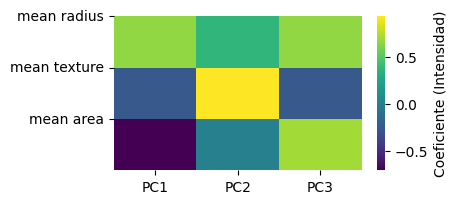

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2))  # Configura el tamaño de la figura
sns.heatmap(componentes , cmap='viridis',
            ax=ax, cbar_kws={'label': 'Coeficiente (Intensidad)'})
ax.set_yticks(np.arange(len(df[cols].columns)))
ax.set_yticklabels(df[cols].columns, rotation=0)
ax.set_xticks(np.arange(3)+.5)
ax.set_xticklabels(["PC1", "PC2", "PC3"])
plt.show()

Una vez calculadas las componentes principales, se puede conocer la cantidad de varianza que explica cada una, su proporción respecto al total y la proporción acumulada.

Esta información se encuentra en los atributos 'explained_variance_' y 'explained_variance_ratio_'

In [ ]:
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.72190823 0.27387887 0.0042129 ]


Text(0, 0.5, '$\\%$ varianza')

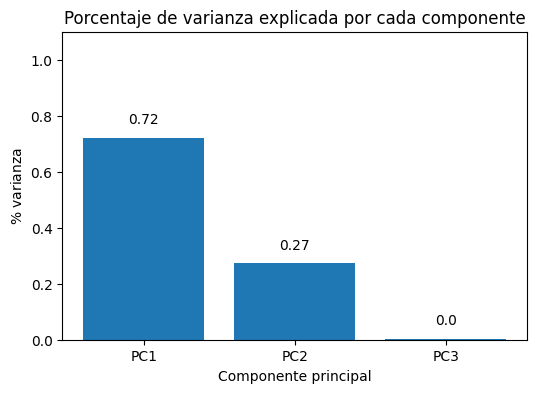

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(df[cols].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
ax.set_xticks(np.arange(3)+1)
ax.set_xticklabels(["PC1", "PC2", "PC3"])
ax.set_ylim(0, 1.1)
ax.set_title(f'Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel(f'$\%$ varianza')

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

Porcentaje de varianza explicada acumulada
------------------------------------------
[0.72190823 0.9957871  1.        ]


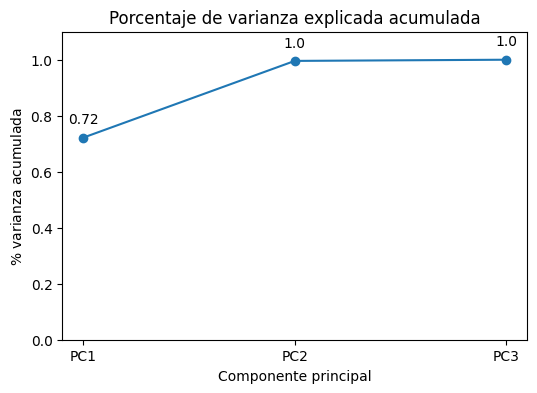

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(len(df[cols].columns)) + 1,
        prop_varianza_acum,
        marker = 'o'
)
for x, y in zip(np.arange(len(df[cols].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(3)+1)
ax.set_xticklabels(["PC1", "PC2", "PC3"])
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel(f'$\%$ varianza acumulada');

Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

### **Transformación**

In [ ]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=df[cols])
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3'],
    index   = df[cols].index
)
proyecciones.head()

,PC1,PC2,PC3
0,0.615404,-2.466846,-0.084899
1,2.333051,-1.292461,0.053698
2,2.233129,-0.383643,-0.014974
3,-0.917325,0.631271,0.004233
4,1.935602,-1.994062,0.049941


### **Reconstrucción**

Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [ ]:
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df[cols].columns,
                    index   = df[cols].index
)
print('------------------')
print('Valores originales')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
display(df[cols].head())

------------------
Valores originales


,mean radius,mean texture,mean area
0,1.097064,-2.073335,0.984375
1,1.829821,-0.353632,1.908708
2,1.579888,0.456187,1.558884
3,-0.768909,0.253732,-0.764464
4,1.750297,-1.151816,1.826229


---------------------
Valores reconstruidos


,mean radius,mean texture,mean area
0,1.097064,-2.073335,0.984375
1,1.829821,-0.353632,1.908708
2,1.579888,0.456187,1.558884
3,-0.768909,0.253732,-0.764464
4,1.750297,-1.151816,1.826229


# **Referencias**

* Bishop, C.M. (2006). *Pattern Recognition and Machine Learning*, Springer. Chapter 12.